## Теория

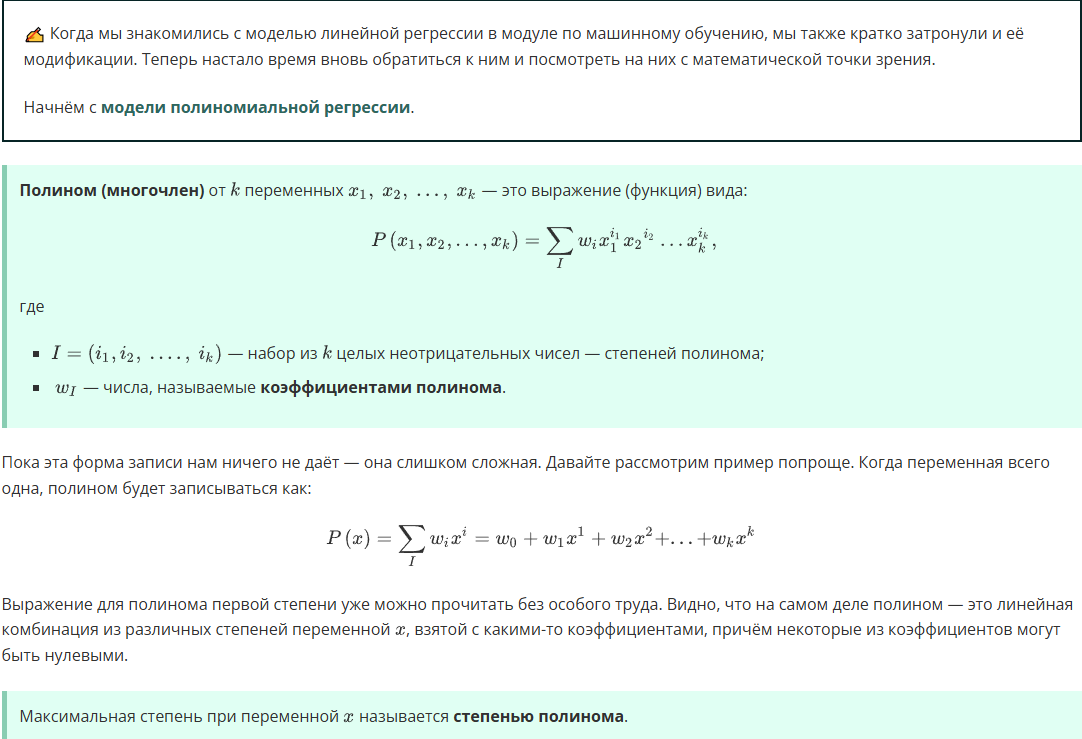
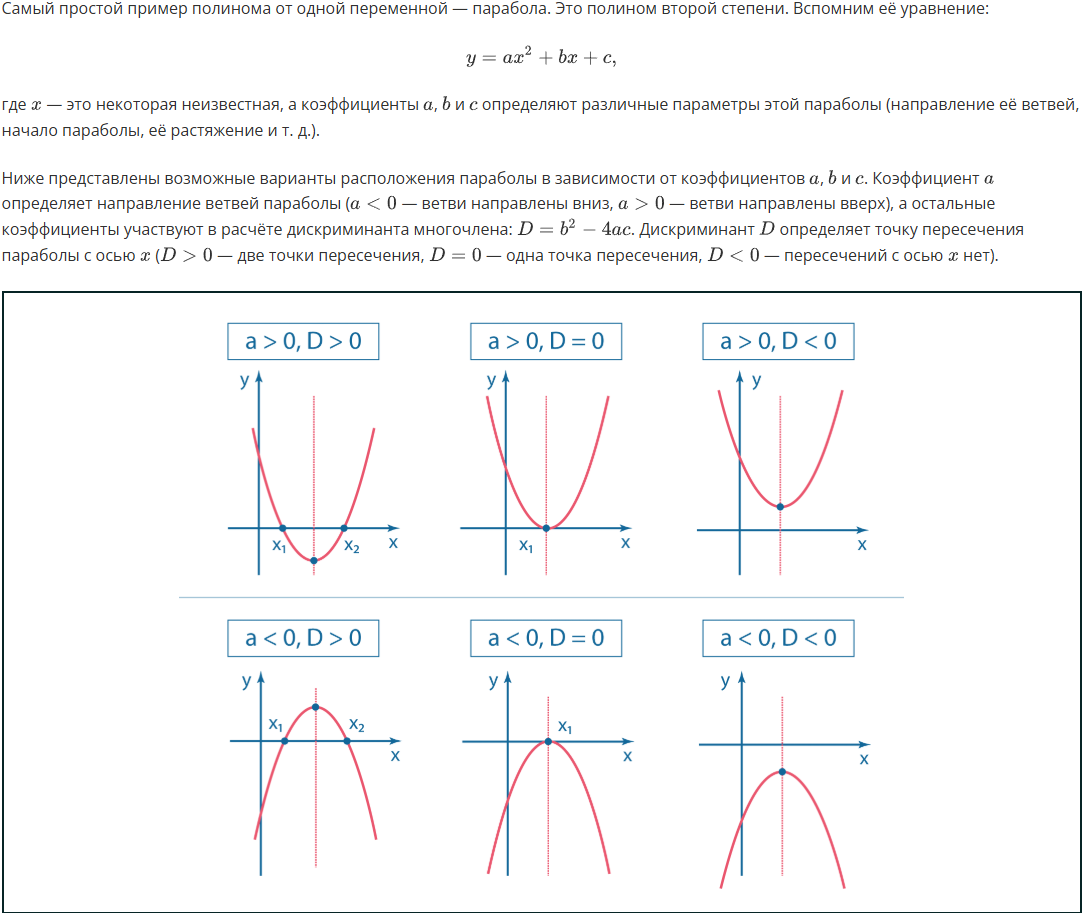
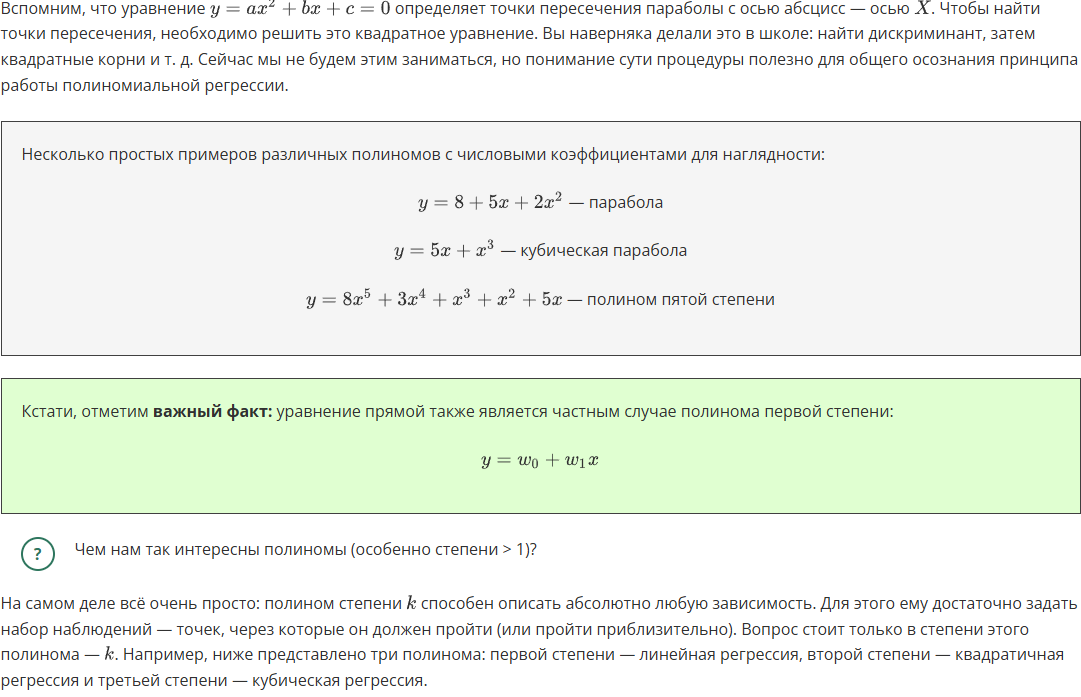
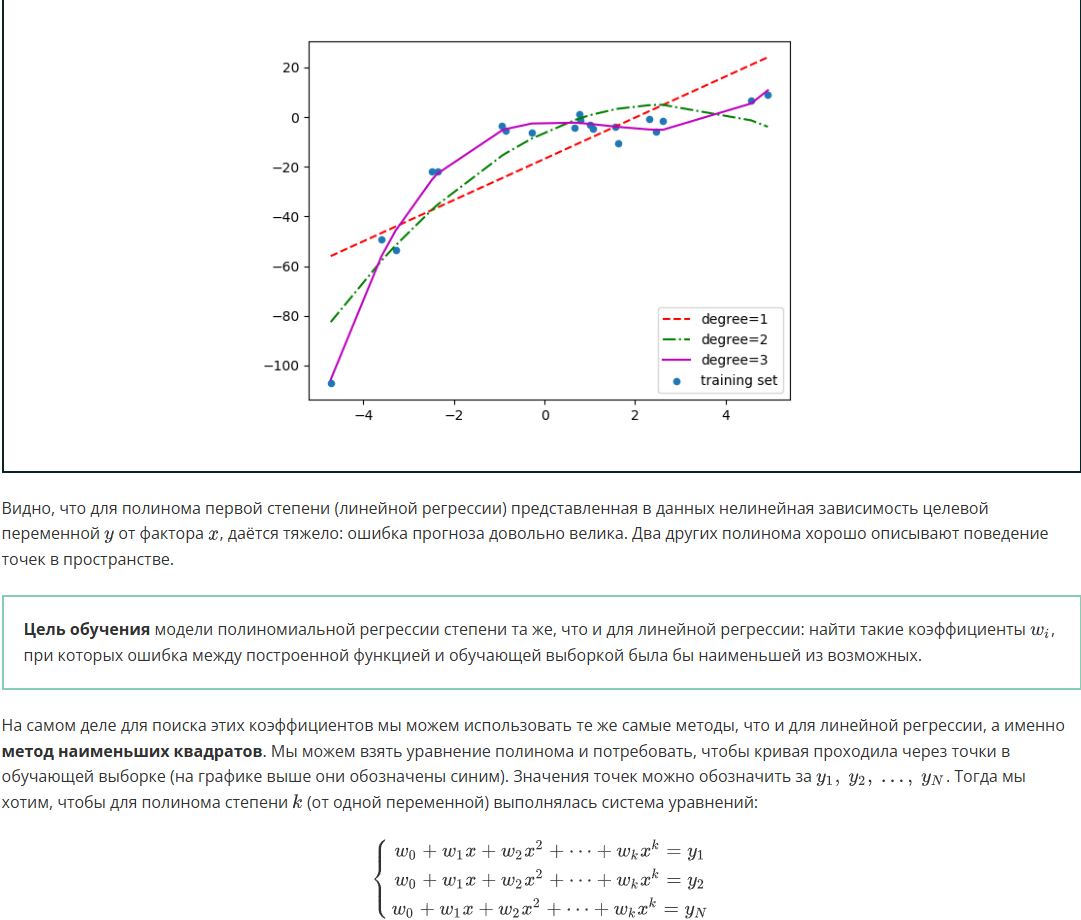
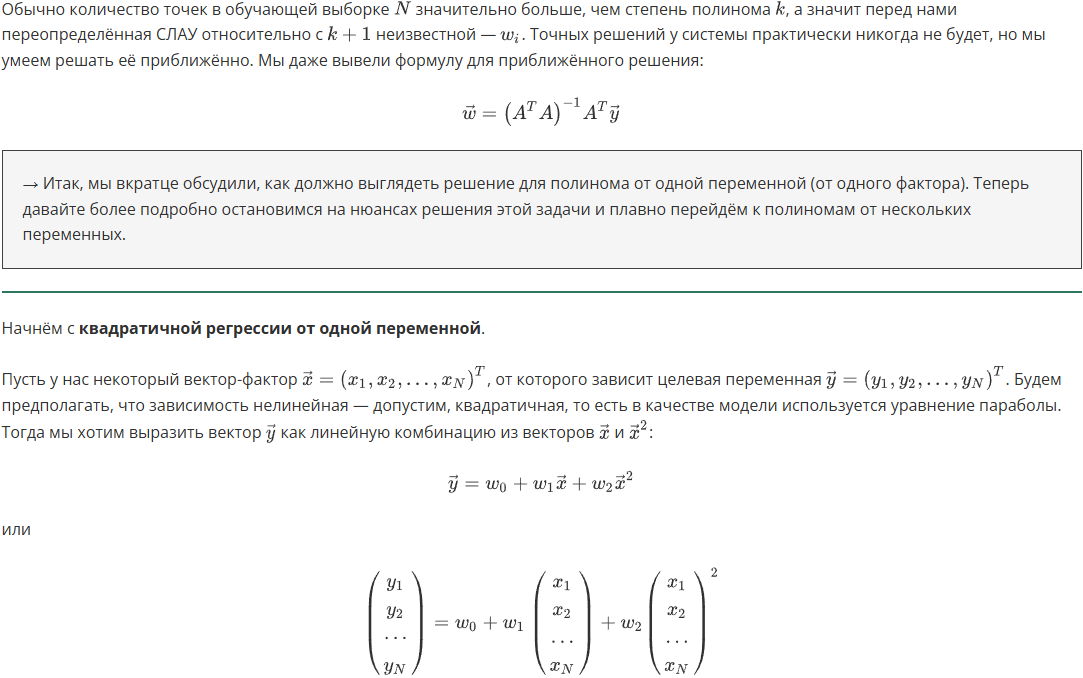
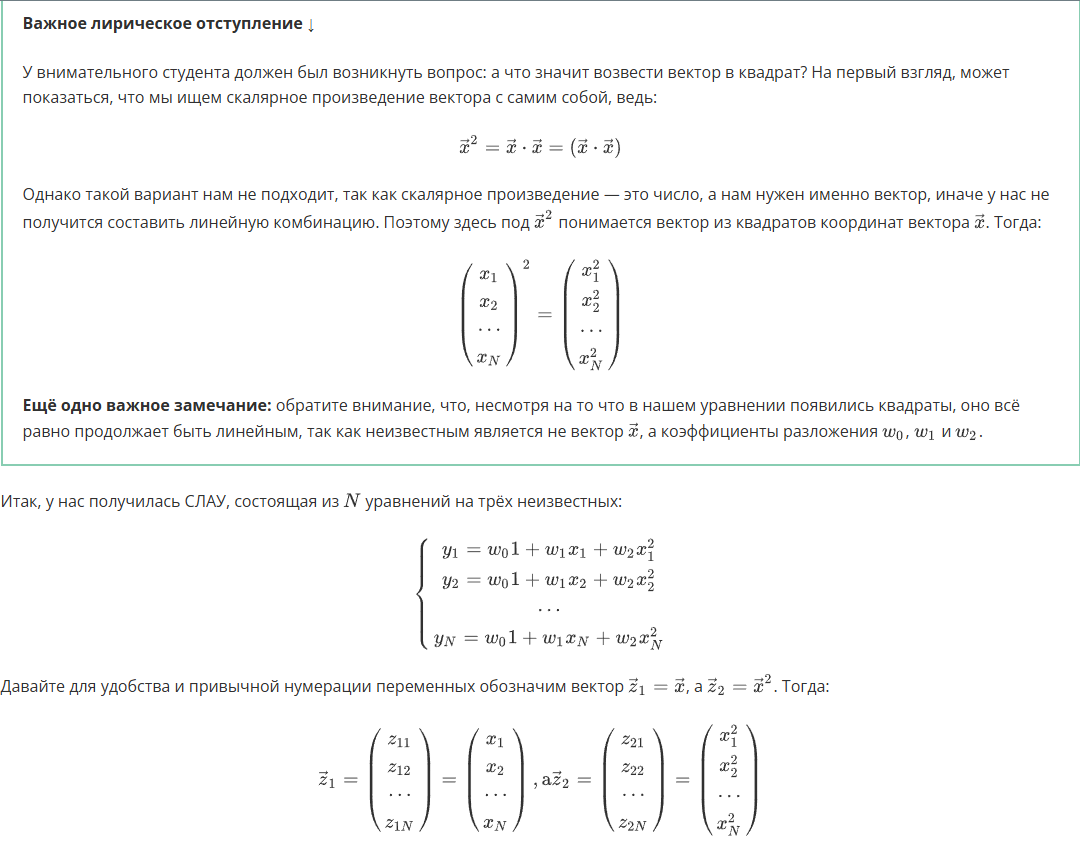
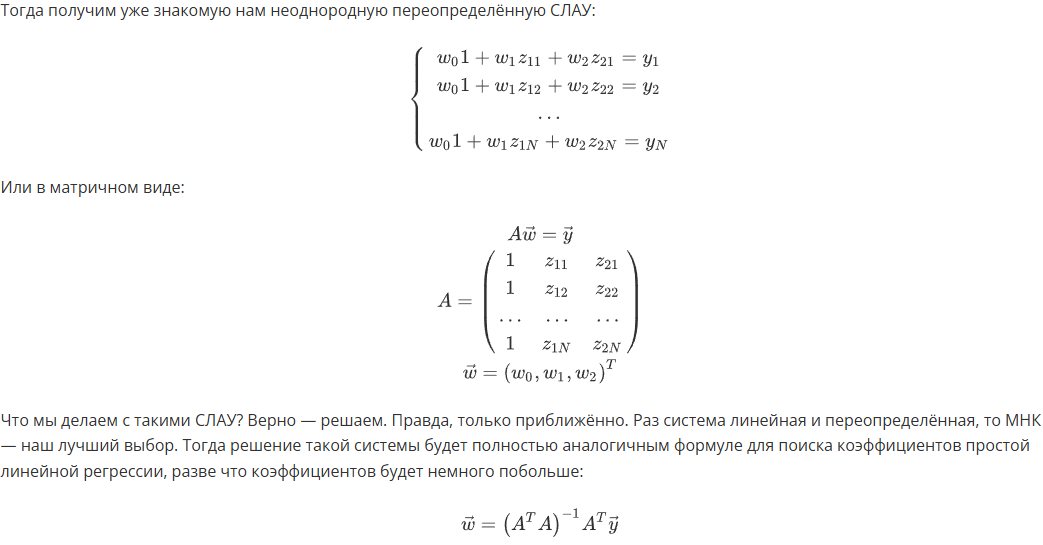
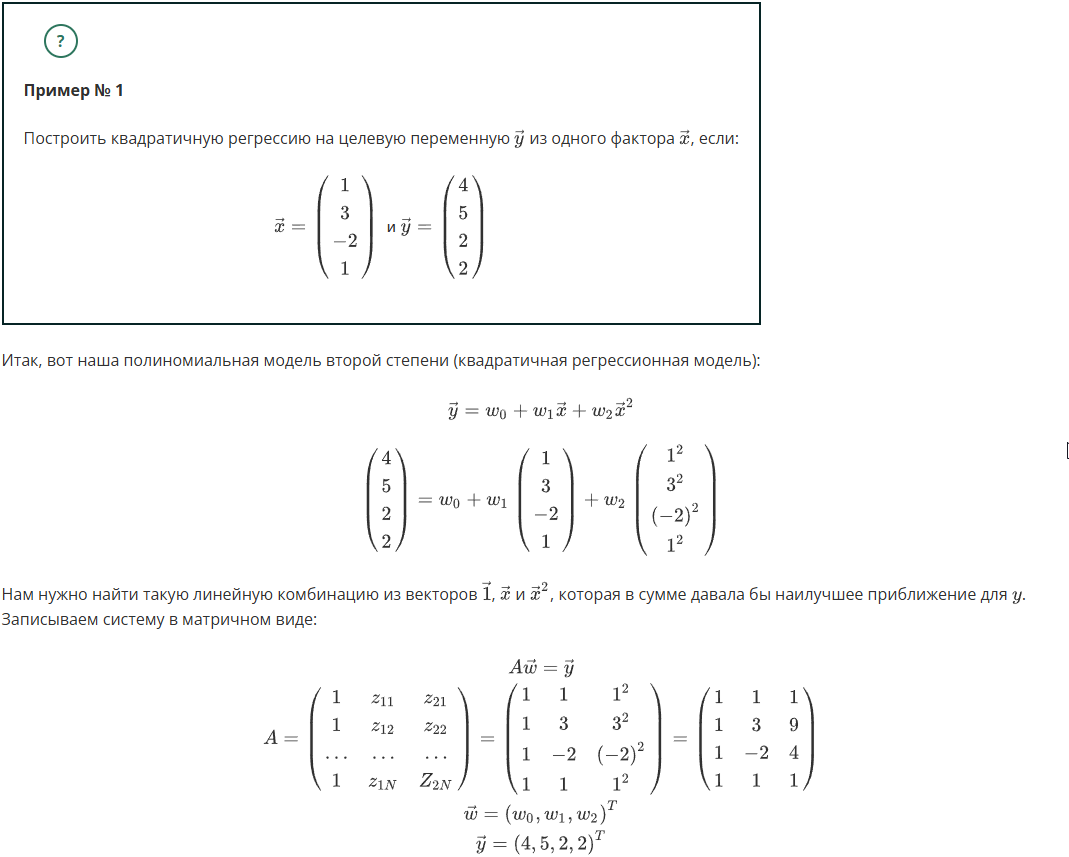
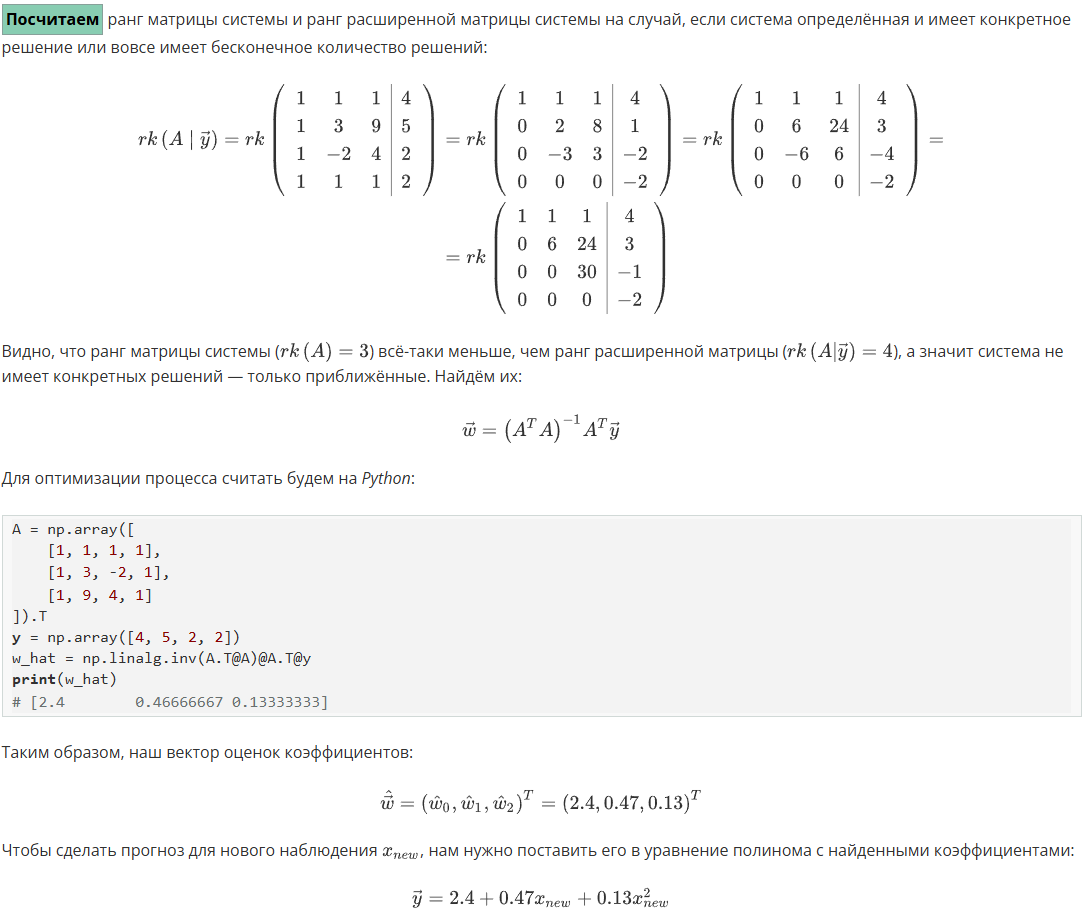
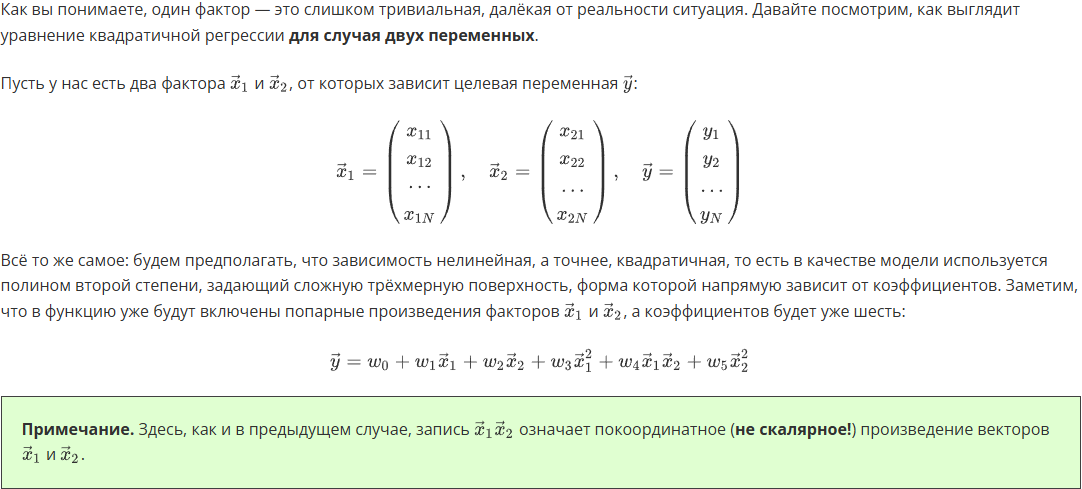
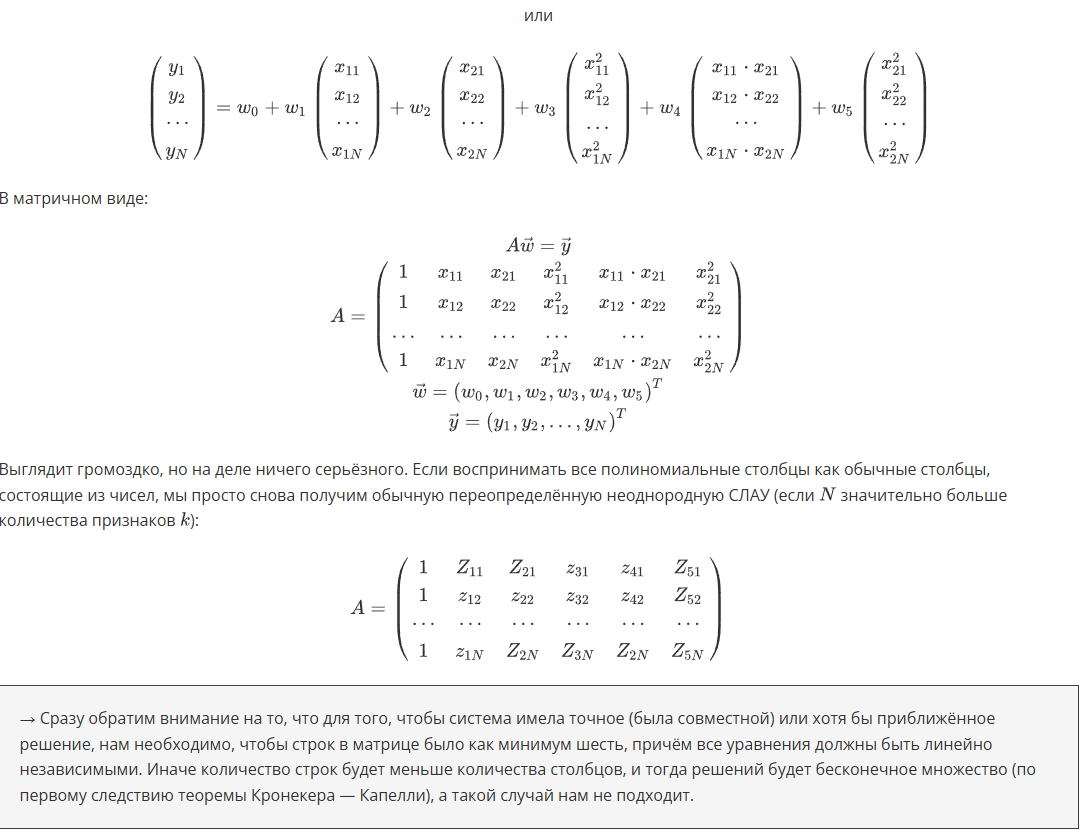
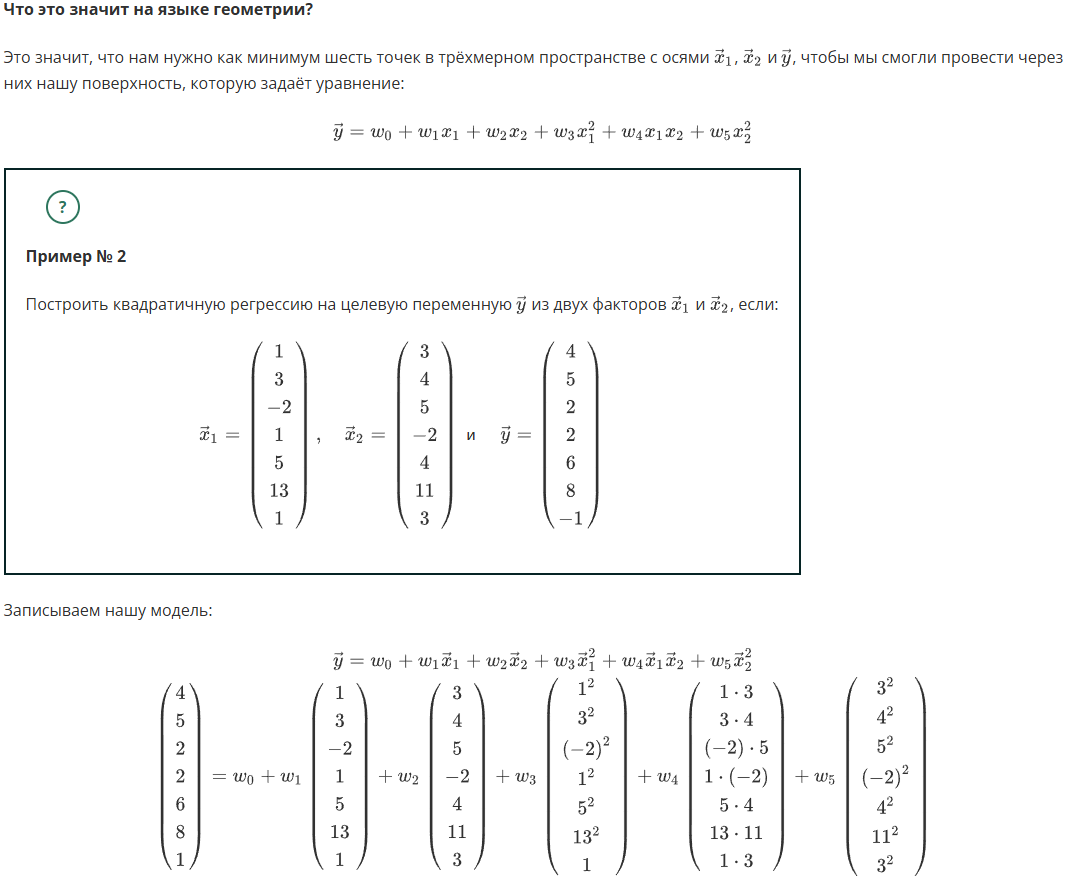
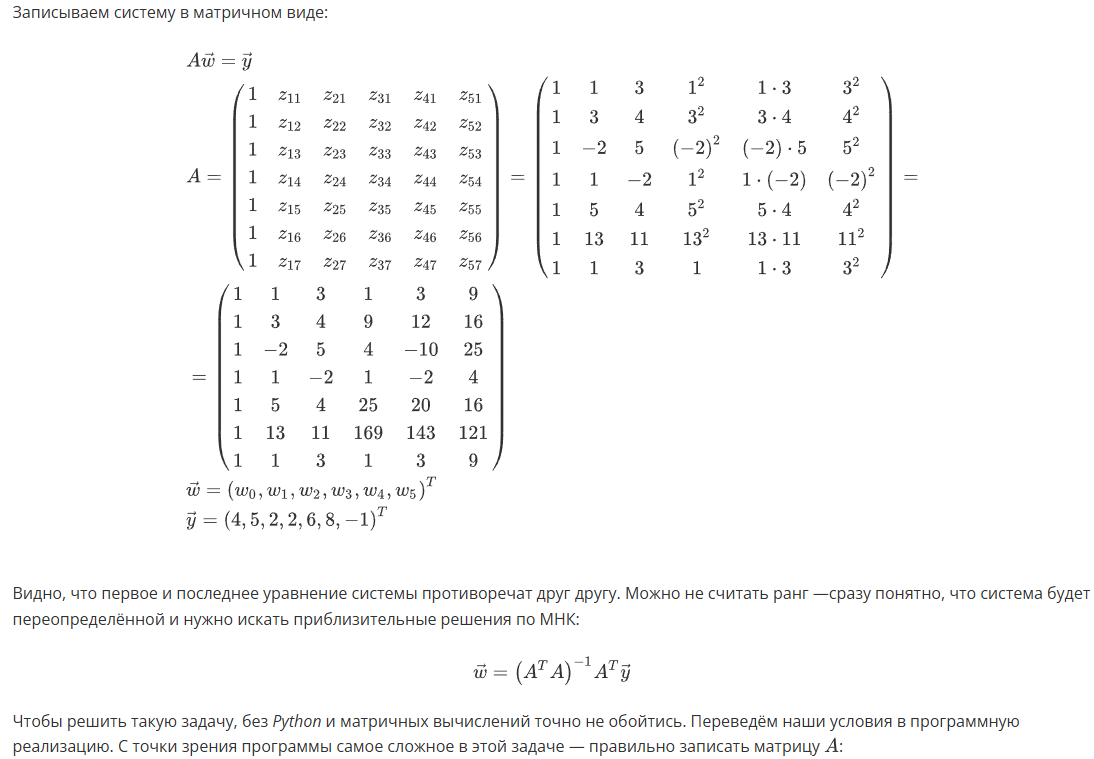
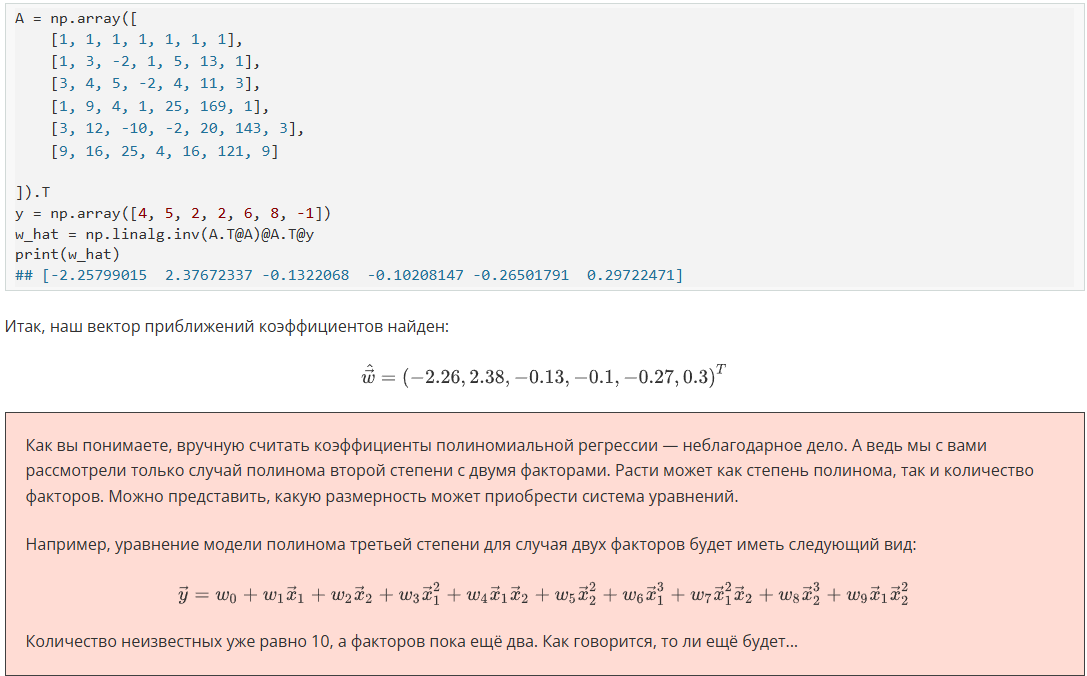
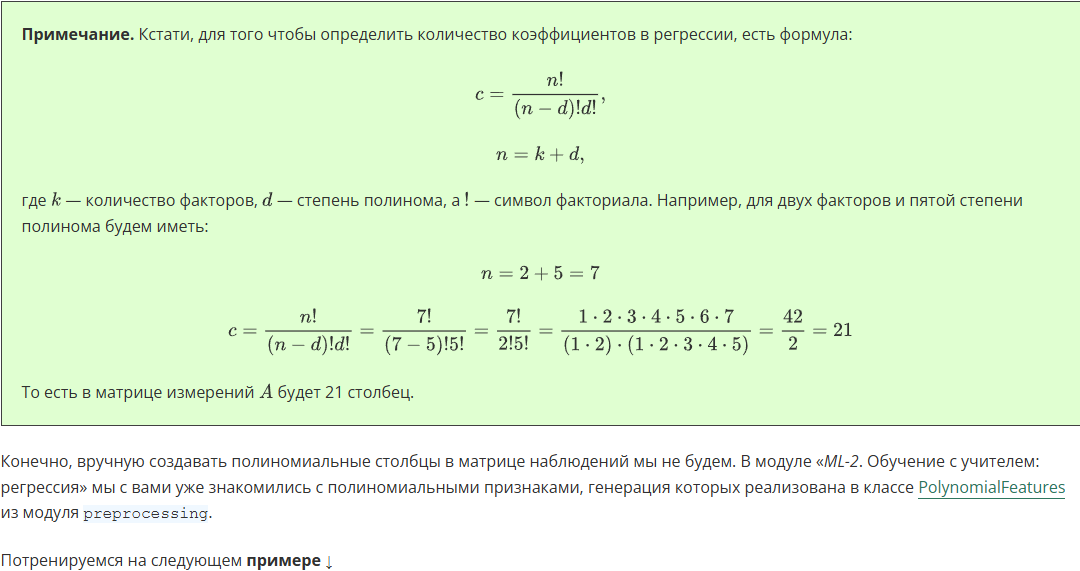

## Решение на Python

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Для начала составим обычную матрицу наблюдений **A**, расположив векторы в столбцах. Обратите внимание, что вектор из 1 мы не будем добавлять в матрицу (за нас это сделает генератор полиномиальных признаков):

In [9]:
A = np.array([
    [1, 3, -2, 1, 5, 13, 1],
    [3, 4, 5, -2, 4, 11, 3],
    [4, 5, 2, 2, 6, 8, -1],
]).T
print(A)

[[ 1  3  4]
 [ 3  4  5]
 [-2  5  2]
 [ 1 -2  2]
 [ 5  4  6]
 [13 11  8]
 [ 1  3 -1]]


Затем импортируем класс PolynomialFeatures из библиотеки sklearn. Создадим объект этого класса, указав при инициализации степень полинома равной 2. Также укажем, что нам нужна генерация столбца из 1 (параметр include_bias=True):

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)

Осталось только вызвать метод fit_transform() от имени этого объекта и передать в него нашу матрицу наблюдений **A**. Для удобства выведем результат в виде DataFrame:

In [11]:
A_poly = poly.fit_transform(A)
display(pd.DataFrame(A_poly))

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,9.0,12.0,16.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,-2.0,5.0,2.0,4.0,-10.0,-4.0,25.0,10.0,4.0
3,1.0,1.0,-2.0,2.0,1.0,-2.0,2.0,4.0,-4.0,4.0
4,1.0,5.0,4.0,6.0,25.0,20.0,30.0,16.0,24.0,36.0
5,1.0,13.0,11.0,8.0,169.0,143.0,104.0,121.0,88.0,64.0
6,1.0,1.0,3.0,-1.0,1.0,3.0,-1.0,9.0,-3.0,1.0


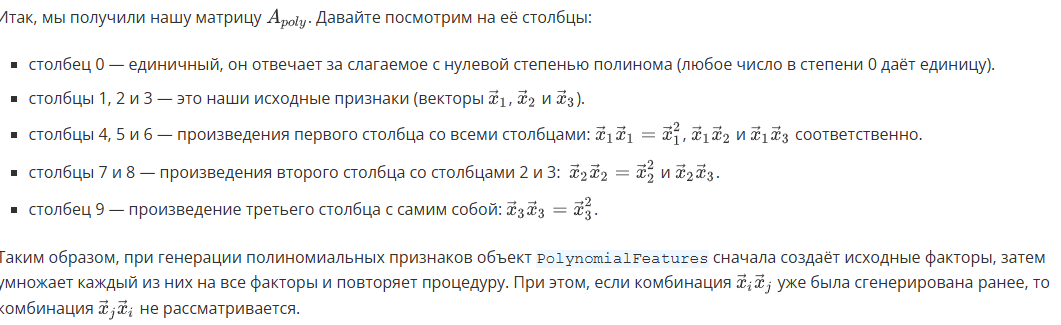

**А теперь построим модель полиномиальной регрессии на реальных данных.**

Возьмём все те же данные о стоимости жилья в районах Бостона. Будем использовать следующие четыре признака: ***LSTAT, CRIM, PTRATIO и RM***. С их помощью мы построим полиномиальную регрессию от первой до пятой степени включительно, а затем сравним результаты по значению средней абсолютной процентной ошибки (*MAPE*).

Чтобы не дублировать код, объявим функцию *polynomial_regression()*. Она будет принимать на вход матрицу наблюдений, вектор ответов и степень полинома, а возвращать матрицу с полиномиальными признаками, вектор предсказаний и коэффициенты регрессии, найденные по МНК:

In [12]:
def polynomial_regression(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=True)
    X_poly = poly.fit_transform(X)
    w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y
    y_pred = X_poly @ w_hat
    return X_poly, y_pred, w_hat

In [13]:
# загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
# Выделяем интересующие нас признаки и строим полиномы:

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]
 
#Задаём полиномиальные признаки (сепеней 1...5)
A_poly, y_pred, w_hat = polynomial_regression(A, y, 1)
A_poly2, y_pred2, w_hat2 = polynomial_regression(A, y, 2)
A_poly3, y_pred3, w_hat3 = polynomial_regression(A, y, 3)
A_poly4, y_pred4, w_hat4 = polynomial_regression(A, y, 4)
A_poly5, y_pred5, w_hat5 = polynomial_regression(A, y, 5)

In [26]:
w_hat2

,PRICE
0,-150.658268
1,0.788773
2,12.543912
3,15.959094
4,1.633667
5,0.021015
6,-0.062615
7,-0.128762
8,-0.018852
9,-0.122682


In [15]:
# Посмотрим на качество построенных регрессий, вычислив метрику:

from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE для полинома 1-й степени {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))
print('MAPE для полинома 2-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))
print('MAPE для полинома 3-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred3)*100))
print('MAPE для полинома 4-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred4)*100))
print('MAPE для полинома 5-й степени  {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred5)*100))

MAPE для полинома 1-й степени 18.20%
MAPE для полинома 2-й степени  13.41%
MAPE для полинома 3-й степени  12.93%
MAPE для полинома 4-й степени  10.74%
MAPE для полинома 5-й степени  743.25%


Что видим? Полиномиальная регрессия первой степени (линейная регрессия) показывает наименьшее качество предсказания, так как зависимость между факторами и целевым признаком нелинейная. С повышением степени полинома процентная ошибка на обучающей выборке вроде бы падает, однако для полинома пятой степени она резко возрастает. Это означает, что модель вообще не описывает зависимость в исходных данных — её прогноз не имеет никакого отношения к действительности.

**Почему так происходит?**

Проведём небольшое исследование. Для начала посмотрим на коэффициенты регрессии для полинома пятой степени. Смотреть на каждый из них неудобно, их слишком много (126, если быть точными), но можно взглянуть на минимум, максимум и среднее:

In [27]:
display(pd.DataFrame(w_hat5).describe())

,PRICE
count,126.000000
mean,1160.625368
std,31845.233012
min,-170523.874548
25%,-1.343045
50%,-0.000787
75%,0.428259
max,309781.637524


Видно, что в степенях минимального и максимального коэффициентов явно что-то не так — коэффициенты слишком огромные (исчисляются миллионами).

Теперь давайте взглянем на корреляционную матрицу для факторов, на которых мы строим полином пятой степени. Корреляцию со столбцом из единиц считать бессмысленно, поэтому мы не будем его рассматривать. Для удобства расчёта матрицы корреляций обернём матрицу  в DataFrame и воспользуемся методом corr():

In [28]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly5[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly5[:, 1:].shape[1])
# Ранг корреляционной матрицы: 110
# Количество факторов: 125

Ранг корреляционной матрицы: 110
Количество факторов: 125


> Мы нашли корень проблемы: ранг корреляционной матрицы — 110, в то время как общее количество факторов (не считая единичного столбца) — 125, то есть ранг корреляционной матрицы не максимален. Это значит, что в корреляционной матрице присутствуют единичные корреляции, а в исходной матрице — линейно зависимые столбцы.

> Как так вышло? На самом деле всё очень просто: в процессе перемножения каких-то из столбцов при создании полинома пятой степени получился такой полиномиальный фактор, который линейно выражается через другие факторы.

> В результате при вычислении обратной матрицы  у нас получилось деление на число, близкое к 0, а элементы обратной матрицы получились просто огромными. Отсюда и появились явно неверные степени коэффициентов, которые дают далёкий от действительности прогноз, что приводит к отрицательной метрике.

Кстати, заметим, что, например, для полинома четвёртой степени ранг матрицы корреляций максимален, то есть равен количеству факторов (не включая единичный столбец):

In [29]:
# считаем матрицу корреляций (без столбца из единиц)
C = pd.DataFrame(A_poly4[:, 1:]).corr()
# считаем ранг корреляционной матрицы
print('Ранг корреляционной матрицы:', np.linalg.matrix_rank(C))
# считаем количество факторов (не включая столбец из единиц)
print('Количество факторов:', A_poly4[:, 1:].shape[1])
## Ранг корреляционной матрицы: 69
## Количество факторов: 69

Ранг корреляционной матрицы: 69
Количество факторов: 69


In [30]:
# Поэтому и коэффициенты регрессии полинома четвёртой степени находятся в адекватных пределах.

display(pd.DataFrame(w_hat4).describe())

,PRICE
count,70.000000
mean,-50.863353
std,887.061736
min,-6922.937285
25%,-0.187942
50%,-0.000802
75%,0.322208
max,2305.054332



А теперь посмотрим, что будет, если использовать для построения полиномиальной регрессии реализацию из библиотеки sklearn. Создадим функцию polynomial_regression_sk — она будет делать то же самое, что и прошлая функция, но средствами sklearn. Дополнительно будем смотреть также стандартное отклонение (разброс) по коэффициентам регрессии

In [ ]:
def polynomial_regression_sk(X, y, k):
    poly = PolynomialFeatures(degree=k, include_bias=False)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression().fit(X_poly, y)
    y_pred = lr.predict(X_poly)
    return X_poly, y_pred, lr.coef_

A = boston_data[['LSTAT', 'PTRATIO', 'RM', 'CRIM']]
y = boston_data[['PRICE']]

for k in range(1, 6):
    A_poly, y_pred, w_hat = polynomial_regression_sk(A, y, k)
    print(
        "MAPE для полинома степени {} — {:.2f}%, СКО — {:.0f}".format(
            k, mean_absolute_percentage_error(y, y_pred)*100, w_hat.std()
        )

    )
# Очередная «магия» sklearn — построение полинома пятой степени прошло успешно.

MAPE для полинома степени 1 — 18.20%, СКО — 2
MAPE для полинома степени 2 — 13.41%, СКО — 5
MAPE для полинома степени 3 — 12.93%, СКО — 9
MAPE для полинома степени 4 — 10.74%, СКО — 304
MAPE для полинома степени 5 — 8.98%, СКО — 290


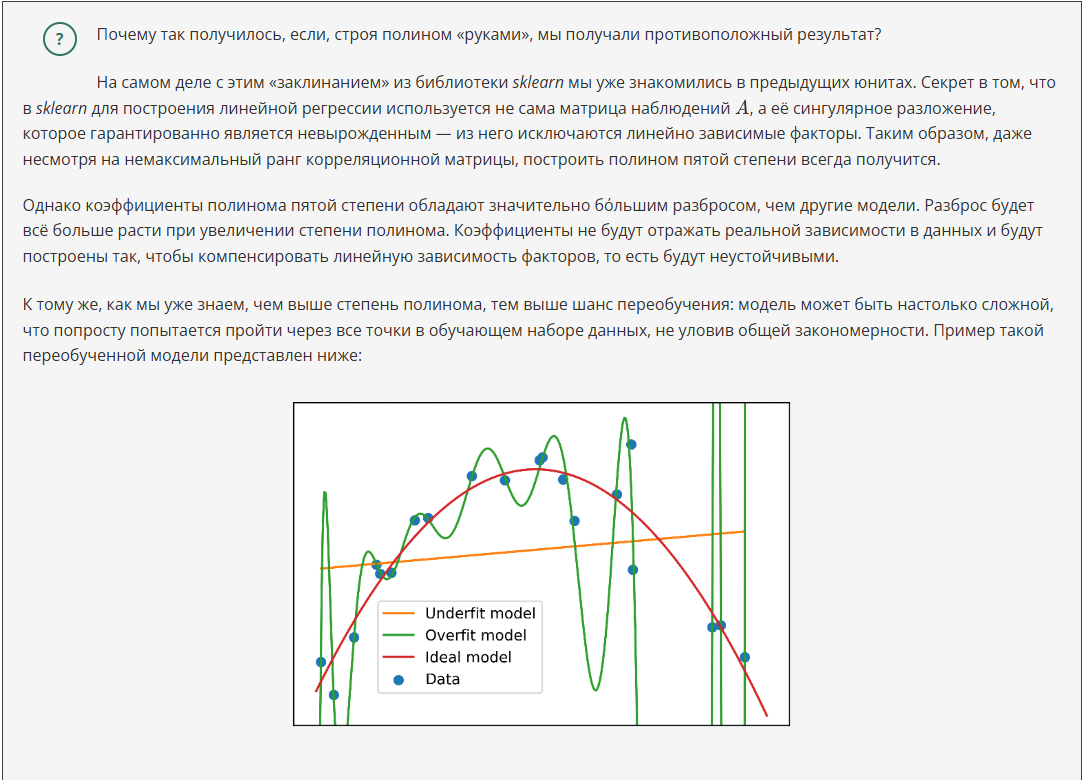
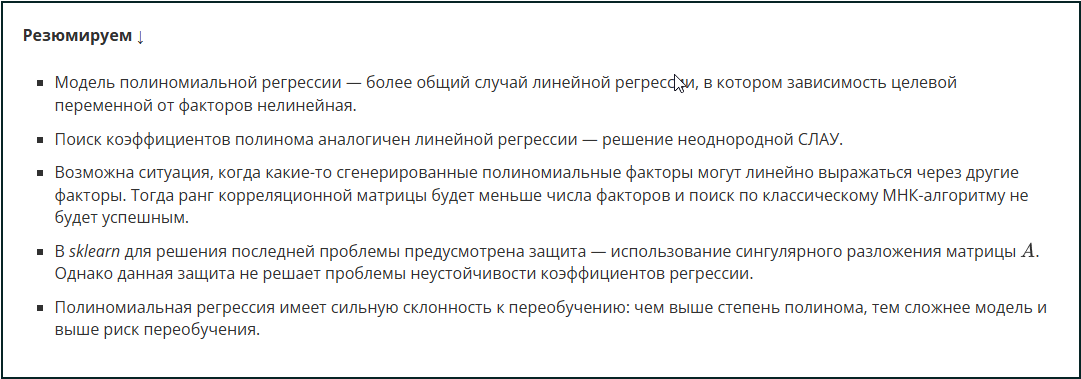

### Задание 6.1

Построена модель полиномиальной регрессии следующего вида:

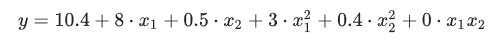

Поступило новое наблюдение, которое характеризуется вектором 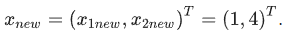.

Сделайте прогноз целевой переменной с помощью полученной полиномиальной регрессии. Ответ округлите до первого знака после точки-разделителя.

In [35]:
w = np.array([10.4,8,0.5,3,0.4,0])
x1 = 1
x2 = 4
y = w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1**2 + w[4]*x2**2 + w[5]*x1*x2
round(y,1)

np.float64(29.8)

### Задание 6.2

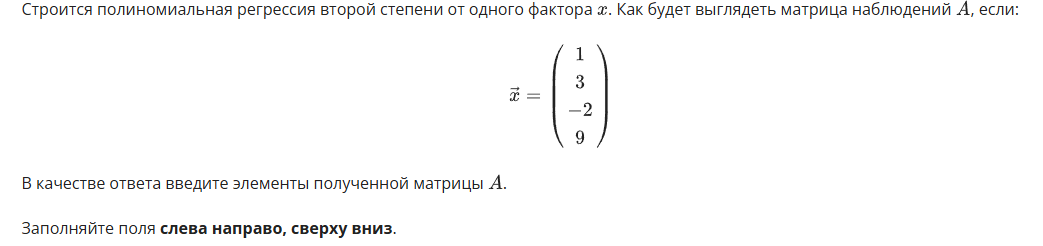

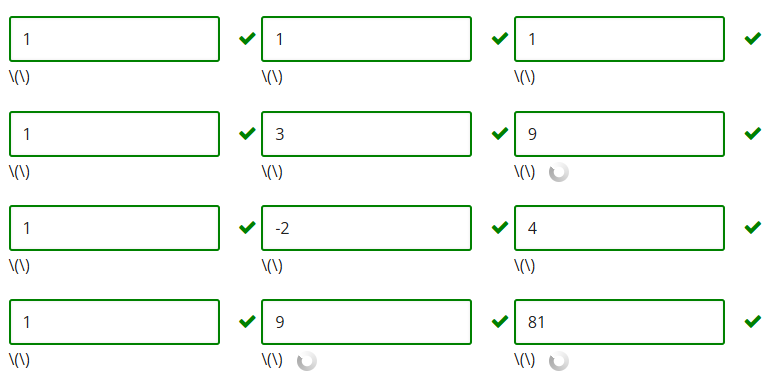

### Задание 6.3

Какую размерность будет иметь матрица измерений **A**, если в наборе данных пять факторов, а в качестве модели используется полином второй степени?

In [38]:
# Функция рекрсии дял расчёта факториала
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n - 1)

In [40]:
k = 5
d = 2
n = k+d
c = factorial(n)/(factorial(n-d)*factorial(d))
c

21.0

### Задание 6.4

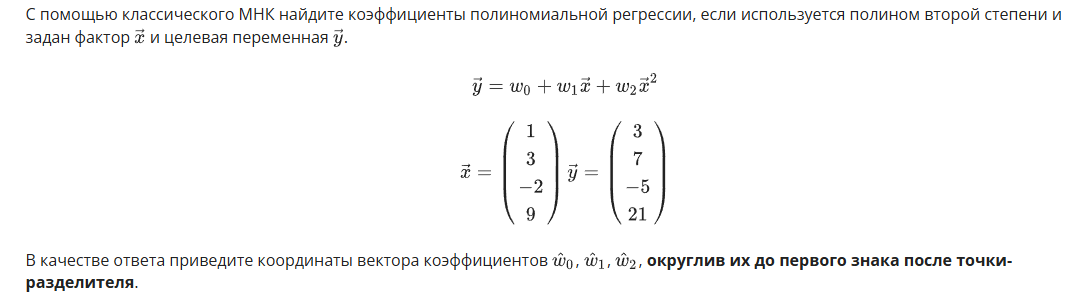

In [ ]:
x = np.array([1,3,-2,9])
X_poly = np.array([[1,1,1,1], [1,3,-2,9], [1,9,4,81]]).T
y = np.array([3,7,-5,21])
w_hat = np.linalg.inv(X_poly.T@X_poly)@X_poly.T@y

In [56]:
w_hat

array([ 0.11446013,  2.46095638, -0.01608801])